In [ ]:
import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Flatten, Dropout, BatchNormalization
from tensorflow.keras.datasets import mnist
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image, ImageOps
import os

# Load and preprocess the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train = x_train / 255.0  # Normalize pixel values
x_test = x_test / 255.0

# Add a channel dimension
x_train = np.expand_dims(x_train, axis=-1)  # Shape: (60000, 28, 28, 1)
x_test = np.expand_dims(x_test, axis=-1)    # Shape: (10000, 28, 28, 1)

# Split training data into training and validation sets
x_train_split, x_val, y_train_split, y_val = train_test_split(
    x_train, y_train, test_size=0.2, random_state=42
)

# Data augmentation
datagen = ImageDataGenerator(
    rotation_range=10,
    width_shift_range=0.1,
    height_shift_range=0.1,
    zoom_range=0.1
)
datagen.fit(x_train_split)

# Build the neural network model
model = Sequential([
    Flatten(input_shape=(28, 28, 1)),  # Updated input shape
    Dense(256, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Set up early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train the model
model.fit(
    datagen.flow(x_train_split, y_train_split, batch_size=32),  # Training generator
    validation_data=(x_val, y_val),  # Validation data
    epochs=20,
    callbacks=[early_stopping]
)

# Evaluate the model on the test dataset
test_loss, test_accuracy = model.evaluate(x_test, y_test, verbose=2)
print(f"\nTest Accuracy: {test_accuracy * 100:.2f}%")

# Function to preprocess and predict a custom image
def predict_custom_image(image_path):
    try:
        # Load and preprocess the image
        img = Image.open(image_path).convert('L')  # Convert to grayscale
        img = ImageOps.invert(img)  # Invert colors for MNIST format
        img = img.resize((28, 28))  # Resize to 28x28 pixels
        img_array = np.array(img)

        # Normalize the image
        img_array = img_array / 255.0

        # Check if the digit is centered; pad if necessary
        img_array = np.pad(img_array, ((4, 4), (4, 4)), mode='constant', constant_values=0)

        # Crop or center the digit
        img_array = img_array[4:-4, 4:-4]

        # Add channel dimension
        img_array = img_array.reshape(1, 28, 28, 1)

        # Predict the digit
        prediction = model.predict(img_array)
        predicted_label = np.argmax(prediction)

        # Display the image and prediction
        plt.imshow(img_array.reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        print(f"Model Prediction: {predicted_label}")
    except Exception as e:
        print(f"Error: {e}. Please ensure the file is a valid image.")

# Test on a custom image
image_path = input("Enter the path to your handwritten digit image: ").strip()
if os.path.exists(image_path):
    predict_custom_image(image_path)
else:
    print("File not found. Please check the file path.")


11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1500/1500 ━━━━━━━━━━━━━━━━━━━━ 35s 21ms/step - accuracy: 0.6577 - loss: 1.0654 - val_accuracy: 0.9417 - val_loss: 0.2017
Epoch 2/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8515 - loss: 0.4758 - val_accuracy: 0.9517 - val_loss: 0.1541
Epoch 3/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.8771 - loss: 0.3858 - val_accuracy: 0.9639 - val_loss: 0.1202
Epoch 4/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 20ms/step - accuracy: 0.8934 - loss: 0.3454 - val_accuracy: 0.9679 - val_loss: 0.1094
Epoch 5/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9015 - loss: 0.3144 - val_accuracy: 0.9690 - val_loss: 0.0992
Epoch 6/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 31s 21ms/step - accuracy: 0.9076 - loss: 0.2953 - val_accuracy: 0.9717 - val_loss: 0.0941
Epoch 7/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 30s 20ms/step - accuracy: 0.9116 - loss: 0.2851 - val_accuracy: 0.9725 - val_loss: 0.0901
Epoch 8/20
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 32s 21ms/step - accuracy: 0.9132 - loss: 0.27

Enter the path to your handwritten digit image: /content/image_2024-11-23_004926022.png
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step


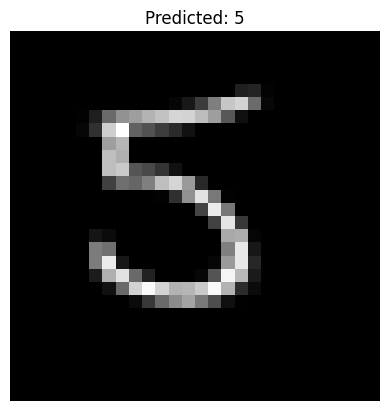

Model Prediction: 5


In [ ]:
# Function to preprocess and predict a custom image
def predict_custom_image(image_path):
    try:
        # Load and preprocess the image
        img = Image.open(image_path).convert('L')  # Convert to grayscale
        img = ImageOps.invert(img)  # Invert colors for MNIST format
        img = img.resize((28, 28))  # Resize to 28x28 pixels
        img_array = np.array(img)

        # Normalize the image
        img_array = img_array / 255.0

        # Check if the digit is centered; pad if necessary
        img_array = np.pad(img_array, ((4, 4), (4, 4)), mode='constant', constant_values=0)

        # Crop or center the digit
        img_array = img_array[4:-4, 4:-4]

        # Add channel dimension
        img_array = img_array.reshape(1, 28, 28, 1)

        # Predict the digit
        prediction = model.predict(img_array)
        predicted_label = np.argmax(prediction)

        # Display the image and prediction
        plt.imshow(img_array.reshape(28, 28), cmap='gray')
        plt.title(f"Predicted: {predicted_label}")
        plt.axis('off')
        plt.show()

        print(f"Model Prediction: {predicted_label}")
    except Exception as e:
        print(f"Error: {e}. Please ensure the file is a valid image.")

# Test on a custom image
image_path = input("Enter the path to your handwritten digit image: ").strip()
if os.path.exists(image_path):
    predict_custom_image(image_path)
else:
    print("File not found. Please check the file path.")